In [1]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

import corner
import matplotlib as mpl

In [2]:
plt.rcdefaults()
fontsize = 14
from matplotlib import font_manager
from matplotlib import rcParams
from matplotlib import rc

cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
plt.rcParams['font.serif']=cmfont.get_name()
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "font.size" : 16,#fontsize,
          "text.usetex" : True,
          "mathtext.fontset" : "cm",
          "font.family" : "serif",
          "font.serif" : [cmfont.get_name()],
          "text.latex.preamble" : r"\usepackage{amsmath}"}
plt.rcParams['axes.unicode_minus']=False
plt.rcParams.update(params)

In [3]:
def read_cov(fname):
    cov = np.genfromtxt(fname, delimiter = ',')
    eig, ev = np.linalg.eig(np.linalg.inv(cov))
    
    if not np.all(eig > 0):
        ind = np.where(eig < 0)[0][0]
        eig[ind] = 1e-6
        hes = ev.dot(np.diag(eig).dot(ev.T))
        cov = np.linalg.inv(hes)
        
    return cov


def gen_cov_ck(cov):
    hes = np.linalg.inv(cov)
    hes[[0,1]] = hes[[1,0]]
    hes[:,[0,1]] = hes[:,[1,0]]
    
    inv_cov_ck = np.zeros((9,9))
    inv_cov_ck[:5,:5] = hes[1:6,1:6]
    
    inv_cov_ck[7,:5] = hes[0,1:6]
    inv_cov_ck[:5,7] = hes[0,1:6]
    
    inv_cov_ck[7,8] = hes[0,6]
    inv_cov_ck[8,7] = hes[0,6]
    
    inv_cov_ck[8,:5] = hes[6, 1:6]
    inv_cov_ck[:5,8] = hes[6, 1:6]
    
    inv_cov_ck[7,7] = hes[0,0]
    inv_cov_ck[8,8] = hes[6,6]
    return inv_cov_ck


def eta_err(a, t):
    
    cov = read_cov(f'../data/cov_a{a}_t{t}.csv')
    inv_cov_ck = gen_cov_ck(cov)

    cov_spec = read_cov(f'../data/cov_spec_a{a}_t{t}.csv')#, delimiter = ',')
    
    inv_cov_sp = np.zeros((9,9))
    inv_cov_sp[:7,:7] = np.linalg.inv(cov_spec)
    
    cov_tot = np.linalg.inv(inv_cov_ck + inv_cov_sp)# - np.eye(9)*1e-1)
    return [np.sqrt(np.diag(cov_tot))[3], np.sqrt(np.diag(cov))[4], np.sqrt(np.diag(cov_spec))[3]]

In [4]:
t_ar = np.linspace(0, 90, 9)

err_0 = eta_err(0,0)
err_2 = np.array([eta_err(2, int(i)) for i in t_ar])
err_8 = np.array([eta_err(8, int(i)) for i in t_ar])

Text(0.5, 1.0, 'spectrum')

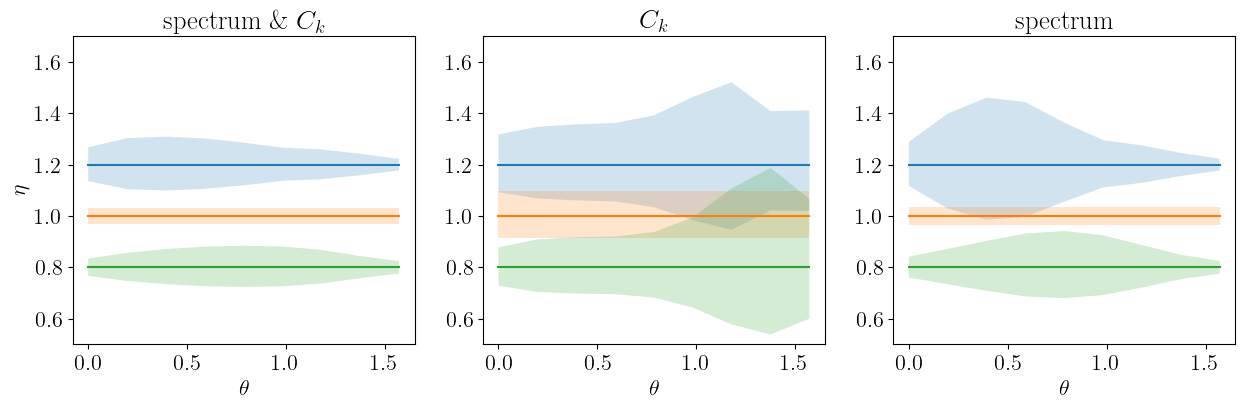

In [5]:
plt.figure(figsize = (15,4))

plt.subplot(131)
plt.plot(np.linspace(0,np.pi/2,9), np.zeros(9)+1.2)
plt.fill_between(np.linspace(0,np.pi/2,9), 1.2*np.exp(-1*err_2[:,0]),1.2*np.exp(err_2[:,0]), alpha= .2)

plt.plot(np.linspace(0,np.pi/2,9), np.zeros(9) + 1)
plt.fill_between(np.linspace(0,np.pi/2,9), 1*np.exp(-1*err_0[0]), 1*np.exp(err_0[0]), alpha= .2)

plt.plot(np.linspace(0,np.pi/2,9), np.zeros(9)+.8)
plt.fill_between(np.linspace(0,np.pi/2,9), 0.8*np.exp(-1*err_8[:,0]),0.8*np.exp(err_8[:,0]), alpha= .2)

plt.ylim(0.5, 1.7)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\eta$')
plt.title(r'$\text{spectrum}~\&~C_k$')

plt.subplot(132)
plt.plot(np.linspace(0,np.pi/2,9), np.zeros(9)+1.2)
plt.fill_between(np.linspace(0,np.pi/2,9), 1.2*np.exp(-1*err_2[:,1]),1.2*np.exp(err_2[:,1]), alpha= .2)

plt.plot(np.linspace(0,np.pi/2,9), np.zeros(9) + 1)
plt.fill_between(np.linspace(0,np.pi/2,9), 1*np.exp(-1*err_0[1]), 1*np.exp(err_0[1]), alpha= .2)

plt.plot(np.linspace(0,np.pi/2,9), np.zeros(9)+.8)
plt.fill_between(np.linspace(0,np.pi/2,9), 0.8*np.exp(-1*err_8[:,1]),0.8*np.exp(err_8[:,1]), alpha= .2)

plt.ylim(0.5, 1.7)
plt.xlabel(r'$\theta$')
plt.title(r'$C_k$')

plt.subplot(133)
plt.plot(np.linspace(0,np.pi/2,9), np.zeros(9)+1.2)
plt.fill_between(np.linspace(0,np.pi/2,9), 1.2*np.exp(-1*err_2[:,2]),1.2*np.exp(err_2[:,2]), alpha= .2)

plt.plot(np.linspace(0,np.pi/2,9), np.zeros(9) + 1)
plt.fill_between(np.linspace(0,np.pi/2,9), 1*np.exp(-1*err_0[2]), 1*np.exp(err_0[2]), alpha= .2)

plt.plot(np.linspace(0,np.pi/2,9), np.zeros(9)+.8)
plt.fill_between(np.linspace(0,np.pi/2,9), 0.8*np.exp(-1*err_8[:,2]),0.8*np.exp(err_8[:,2]), alpha= .2)

plt.ylim(0.5, 1.7)
plt.xlabel(r'$\theta$')
plt.title(r'spectrum')
#plt.savefig('theta_eta.png', bbox_inches = 'tight')